# The Indentor Benchmark

In [1]:
import UWGeodynamics as GEO
import glucifer

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-0.5, 0.), 
                  maxCoord=(0.5, 1.0),
                  gravity=(0., 0.))

In [3]:
Model.outputDir = "outputs"

In [4]:
Model.minViscosity = 1e-3
Model.maxViscosity = 1e3

In [5]:
Material = Model.add_material(name="Material", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))

In [6]:
Material.viscosity = 1e1
Material.density = 0.01
Material.plasticity = GEO.VonMises(cohesion=1.0)

In [7]:
cond1 = (Model.mesh.data[Model.top_wall.data][:, 0] < 0.0625)
cond2 = (Model.mesh.data[Model.top_wall.data][:, 0] > -0.0625)

indices = Model.top_wall.data[cond1 * cond2]

IndexSet = GEO.uw.mesh.FeMesh_IndexSet(Model.mesh, topologicalIndex=0, size=Model.mesh.nodesGlobal, fromObject=indices)

In [8]:
Model.set_velocityBCs(left=[0.0, None], right=[0.0, None], bottom=[0.0, 0.0], nodeSets=[([None, -1.0], IndexSet)])

In [9]:
Model.init_model()

In [10]:
GEO.rcParams["initial.nonlinear.min.iterations"] = 3
GEO.rcParams["initial.nonlinear.max.iterations"] = 3
GEO.rcParams["initial.nonlinear.tolerance"] = 1e-9
GEO.rcParams["nonlinear.tolerance"] = 1e-9
GEO.rcParams["surface.pressure.normalization"] = False

In [13]:
!rm -rf outputs/
Model.run_for(nstep=1)

Running with UWGeodynamics version 0.9.4-dev-1011449(development)
Step:1 Model Time:  0.007777318130884348 year dt: 0.0 year (2018-11-12 23:38:02)


1


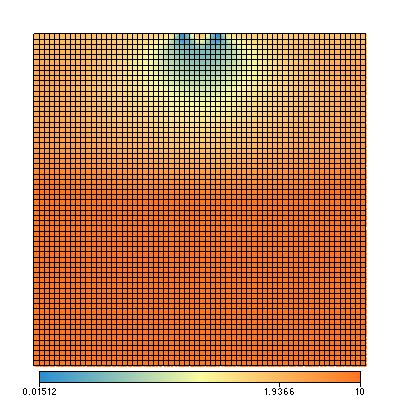

In [16]:
Fig = glucifer.Figure(figsize=(400,400))
Fig.Points(Model.swarm, Model.viscosityField, fn_size=3.0, logScale=True)
Fig.Mesh(Model.mesh)
Fig.show()


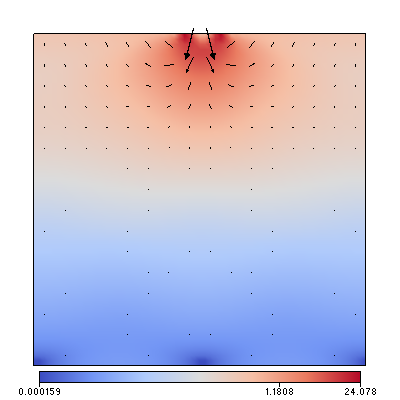

In [17]:
Fig = glucifer.Figure(figsize=(400,400))
Fig.Surface(Model.mesh, Model.strainRateField, logScale=True, colours="coolwarm")
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()

In [18]:
Model.checkpoint(checkpointID=1)